# 📈 Load Prediction Model - Full Features (ready_for_models_final.csv)

In this section, we build a more advanced predictive model for service call load based on date, topic, holiday, rain, and temperature features.

The steps include:
- Data preparation
- Model training (Linear Regression and Random Forest)
- Evaluation and visualization


In [1]:
# Install required libraries if needed
# !pip install pandas scikit-learn matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
data = pd.read_csv('../data/ready_for_models_final.csv', low_memory=False)
print(f"Data shape: {data.shape}")
data.head()


Data shape: (98095, 204)


,משך טיפול (בשעות),האם חג,Rain,Temp-R,Winter,Spring,Summer,Autumn,אגף_אגף גזברות,אגף_אגף החברה כלכלית,...,חודש_10,חודש_11,חודש_12,שנה_2019,שנה_2020,שנה_2021,שנה_2022,שנה_2023,שנה_2024,שנה_2025
0,0.0,0,0.0,24,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0.0,0,0.0,24,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0.0,0,0.0,24,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0.0,0,0.0,24,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0.0,0,0.0,24,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [2]:
# Create calls_count column
data['calls_count'] = 1

print("✅ Added 'calls_count' column")


✅ Added 'calls_count' column


In [3]:
# 📊 Group by relevant features

group_keys = []

# שנה
group_keys += [col for col in data.columns if col.startswith('שנה_')]

# חודש
group_keys += [col for col in data.columns if col.startswith('חודש_')]

# יום
group_keys += [col for col in data.columns if col.startswith('יום_')]

# נושא
group_keys += [col for col in data.columns if col.startswith('נושא_')]

# חג, גשם, טמפרטורה
group_keys += ['חג', 'Rain', 'Temp-R']

# Grouping
agg_data = data.groupby(group_keys).agg(calls_count=('calls_count', 'sum')).reset_index()

print(f"✅ Aggregated data shape: {agg_data.shape}")
agg_data.head()


✅ Aggregated data shape: (31894, 114)


C:\Users\mevas\AppData\Local\Temp\ipykernel_3720\1169747618.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  agg_data = data.groupby(group_keys).agg(calls_count=('calls_count', 'sum')).reset_index()
C:\Users\mevas\AppData\Local\Temp\ipykernel_3720\1169747618.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  agg_data = data.groupby(group_keys).agg(calls_count=('calls_count', 'sum')).reset_index()
C:\Users\mevas\AppData\Local\Temp\ipykernel_3720\1169747618.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is 

,שנה_2019,שנה_2020,שנה_2021,שנה_2022,שנה_2023,שנה_2024,שנה_2025,חודש_1,חודש_2,חודש_3,...,נושא_תחבורה ציבורית,נושא_תלונות / בקשות כללי,נושא_תלונות- בקשות/כללי,נושא_תלונות/בקשות כללי,נושא_תשלומים למועצה:,נושא_תשתיות ומבני ציבורי - יצירת קשר,חג,Rain,Temp-R,calls_count
0,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0.0,24,1
1,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0.0,24,17
2,0,0,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0.0,24,14
3,0,0,0,0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0.0,24,2
4,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0.0,24,7


In [4]:
# ✂️ Define features and target
X = agg_data.drop('calls_count', axis=1)
y = agg_data['calls_count']

print(f"✅ X shape: {X.shape}")
print(f"✅ y shape: {y.shape}")


✅ X shape: (31894, 113)
✅ y shape: (31894,)


In [5]:
# 🛠️ Split into Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"✅ Train set shape: {X_train.shape}")
print(f"✅ Test set shape: {X_test.shape}")


✅ Train set shape: (25515, 113)
✅ Test set shape: (6379, 113)


In [6]:
# 🚀 Train Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict
y_pred_linear = linear_model.predict(X_test)

# Evaluate
mae_linear = mean_absolute_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
r2_linear = r2_score(y_test, y_pred_linear)

print("=== Linear Regression Results ===")
print(f"MAE: {mae_linear:.2f}")
print(f"RMSE: {rmse_linear:.2f}")
print(f"R2 Score: {r2_linear:.2f}")


=== Linear Regression Results ===
MAE: 1.74
RMSE: 2.89
R2 Score: 0.42


In [7]:
# 🚀 Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("=== Random Forest Results ===")
print(f"MAE: {mae_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R2 Score: {r2_rf:.2f}")


=== Random Forest Results ===
MAE: 1.52
RMSE: 2.75
R2 Score: 0.48


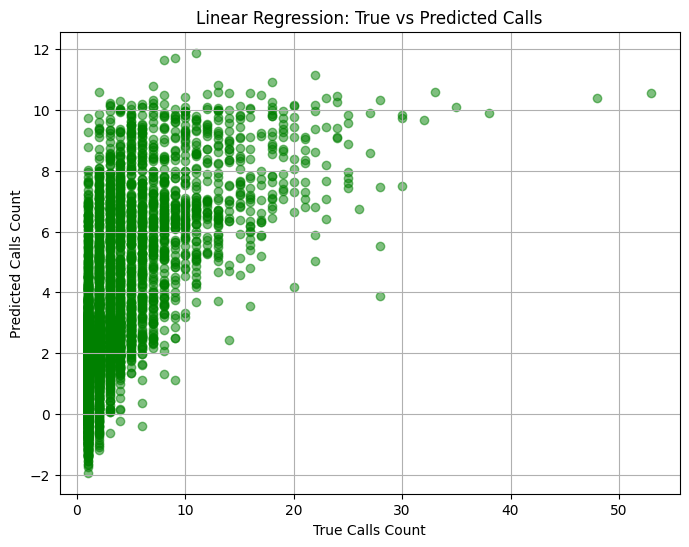

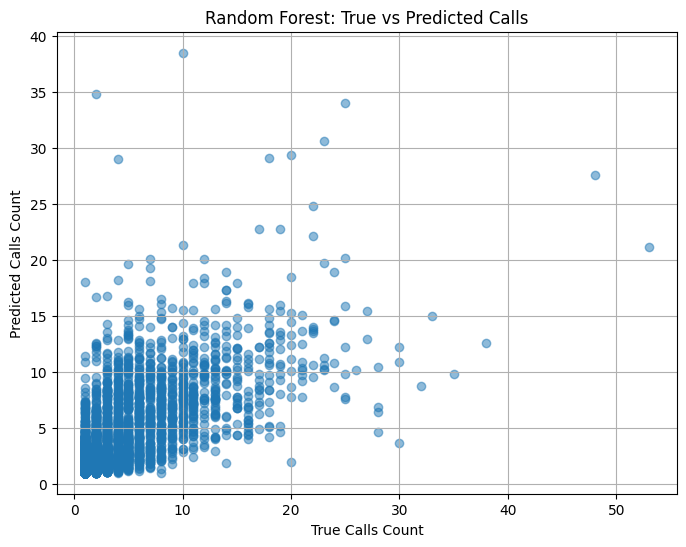

In [8]:
# 📈 Linear Regression: True vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_linear, alpha=0.5, color='green')
plt.xlabel('True Calls Count')
plt.ylabel('Predicted Calls Count')
plt.title('Linear Regression: True vs Predicted Calls')
plt.grid(True)
plt.show()

# 📈 Random Forest: True vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel('True Calls Count')
plt.ylabel('Predicted Calls Count')
plt.title('Random Forest: True vs Predicted Calls')
plt.grid(True)
plt.show()


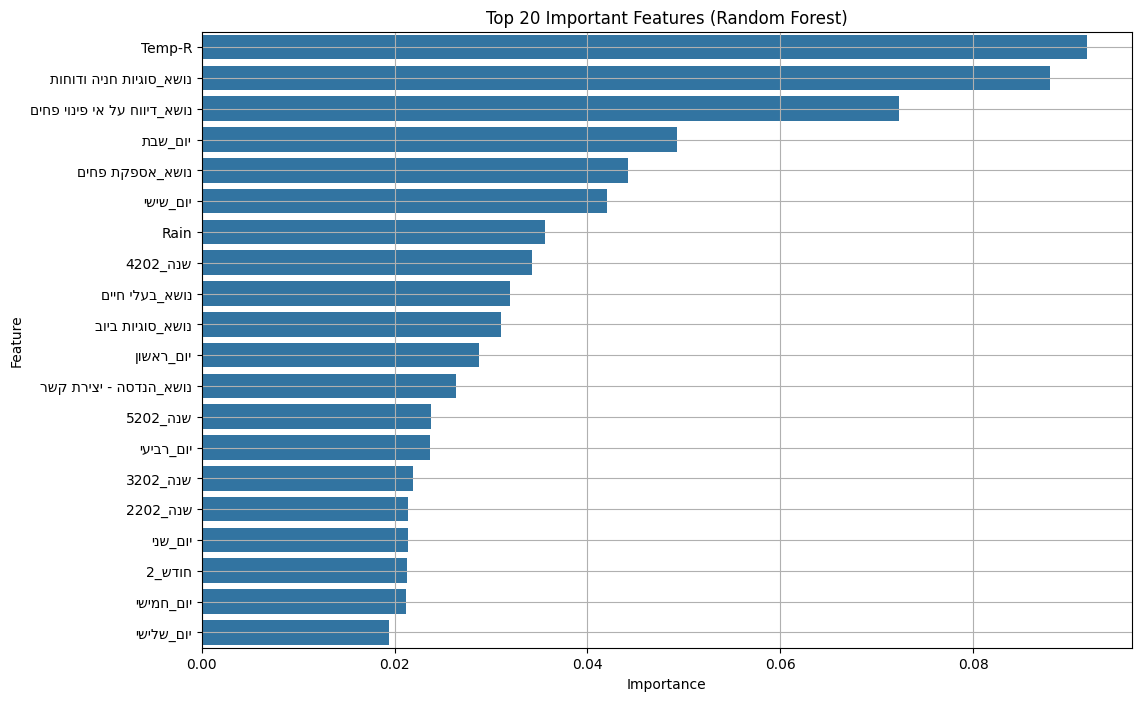

In [10]:
# 📋 Feature Importance with Hebrew Reversal
importances = rf_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# ✅ Reverse only Hebrew feature names
def reverse_if_hebrew(text):
    if any('\u0590' <= c <= '\u05FF' for c in text):
        return text[::-1]
    return text

importance_df['Feature'] = importance_df['Feature'].apply(reverse_if_hebrew)

# 📊 Plot
plt.figure(figsize=(12,8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(20))
plt.title('Top 20 Important Features (Random Forest)')
plt.grid(True)
plt.show()
